In [27]:
import networkx as nx
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.pyplot import figure

def isNaN(num):
    return num != num

In [21]:
# read values from excel database
xlsx_path = 'tweets_database.xlsx'
data = pd.read_excel(xlsx_path)
data

,HASHTAG,OTHER HASHTAGS,AUTHOR ID,TEXT,RETWEET?,LOCATION,FOLLOWERS
0,#smokefree,NaN,1375244479049895941,rt @oneyoumerton: it’s never too late to quit ...,1,NaN,"3300235269,2973089171,791481954583445504,42141..."
1,#stopsmoking,"#merton,#getsupport,#quitsmoking",738354971612205056,it’s never too late to quit smoking! you will ...,0,NaN,"821683659971371008,1512334148505059330,2942480..."
2,#stopsmoking,"#breakyourcigarette,#nosmoking,#saynotosmoking...",1046632809622843392,quit now. your life depends on it.\n\n ✅ follo...,0,NaN,"257617860,269203773,1309172431546974209,143638..."
3,#stopsmoking,#bre,1375244479049895941,rt @doctor360_mena: quit now. your life depend...,1,NaN,"3300235269,2973089171,791481954583445504,42141..."
4,#stopsmoking,"#breakyourcigarette,#nosmoking,#saynotosmoking...",1512355447512047621,quit now. your life depends on it.\n\n ✅ follo...,0,NaN,"785788443293016064,1502126509389398020"
5,#stopsmoking,"#cad,#heartdisease,#ditillu,#drmukharjee,#puls...",1213357401178427397,rt @drmssm: please stop smoking. now. #stopsmo...,1,NaN,"961726564395200512,1259443655724666880,1490599..."
6,#smokefree,#smoker,1224922284080668673,rt @achievelifesci: $achv is proud to be enrol...,1,NaN,"1489200515246395395,1499447207627476996,151355..."
7,#stopsmoking,#jointhequitters,1375244479049895941,rt @newingtonchemi1: it's never too late to #j...,1,NaN,"3300235269,2973089171,791481954583445504,42141..."
8,#stopsmoking,#smokingkills,1375244479049895941,rt @barriemadieu1: #smokingkills.\n#stopsmokin...,1,NaN,"3300235269,2973089171,791481954583445504,42141..."
9,#stopsmoking,"#jointhequitters,#quitsmoking,#nosmoking",773558752914079744,it's never too late to #jointhequitters.\n\nco...,0,NaN,"1452959760937099264,1484872476098187265,214892..."


Project section 4

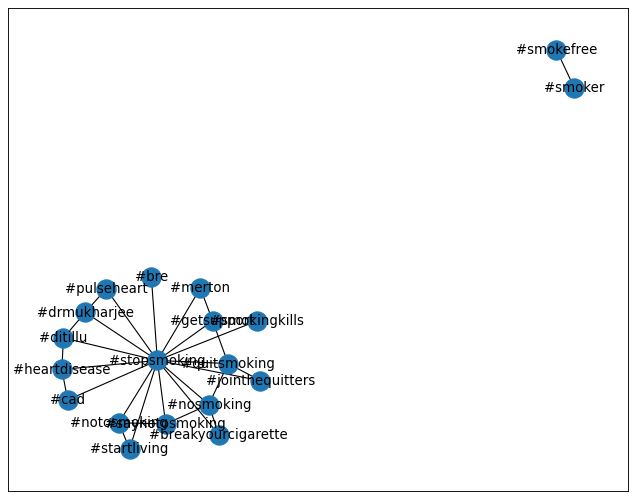

In [33]:
G = nx.Graph()
hashtag = data['HASHTAG'].tolist()
other_hashtags = data['OTHER HASHTAGS'].tolist()

for i in range(len(hashtag)):
    tag = hashtag[i]
    if(tag not in  list(G.nodes())):
        G.add_node(tag)
    other_tags = other_hashtags[i]
    if(isNaN(other_tags)):
        continue
    other_tags = other_tags.split(",")
    last_tag = other_tags[0]
    for other_tag in other_tags:
        if(other_tag not in list(G.nodes())):
            G.add_node(other_tag)
        G.add_edge(tag,other_tag)
        if(last_tag != other_tag ):
            G.add_edge(last_tag,other_tag)
        last_tag = other_tag

figure(figsize=(10, 8), dpi=80)
nx.draw_networkx(G)
plt.show()
